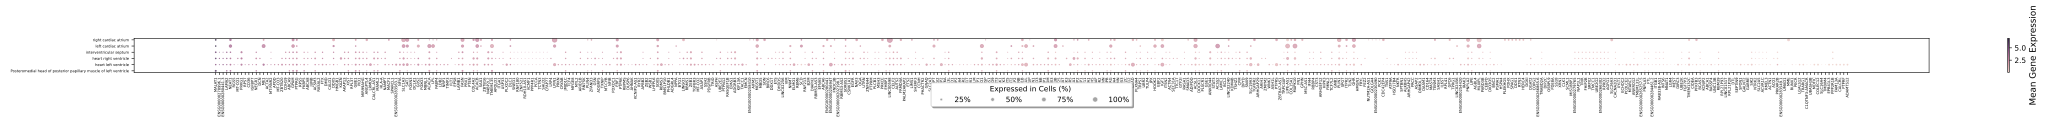

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
import pandas as pd
from IPython.display import SVG

data = pd.read_csv('out3.csv')

subset_data = data.groupby(['as', 'biomarker_label']).agg({
    'cell_type_percentage': 'mean',
    'mean_expression_value': 'mean'
}).reset_index()

biomarker_order = subset_data.groupby('biomarker_label')['mean_expression_value'].mean().sort_values(ascending=False).index

subset_data['biomarker_label'] = pd.Categorical(subset_data['biomarker_label'], categories=biomarker_order, ordered=True)
subset_data = subset_data.sort_values('biomarker_label')

pivot_count = subset_data.pivot(index='as', columns='biomarker_label', values='mean_expression_value')
pivot_percentage = subset_data.pivot(index='as', columns='biomarker_label', values='cell_type_percentage')

norm_count = Normalize(vmin=pivot_count.min().min(), vmax=pivot_count.max().max())
max_size = 50 
max_percentage = pivot_percentage.max().max()
norm_percentage = Normalize(vmin=0, vmax=max_percentage, clip=True)

cmap = sns.cubehelix_palette(as_cmap=True)

fig, ax = plt.subplots(figsize=(40, 1.8))

for i, as_value in enumerate(pivot_count.index):
    for j, biomarker_label in enumerate(pivot_count.columns):
        count = pivot_count.loc[as_value, biomarker_label]
        percentage = pivot_percentage.loc[as_value, biomarker_label]
        size = (norm_percentage(percentage) * max_size) if not np.isnan(percentage) else 0
        if size > 0:
            ax.scatter(j, i, color=cmap(norm_count(count)), s=size, alpha=0.7)

ax.set_xticks(np.arange(len(pivot_count.columns)))
ax.set_xticklabels(pivot_count.columns, rotation=90)
ax.set_yticks(np.arange(len(pivot_count.index)))
ax.set_yticklabels(pivot_count.index)
# ax.tick_params(axis='x', labelsize=10)
# ax.tick_params(axis='y', labelsize=5)

current_font_size = plt.rcParams['font.size']
ax.tick_params(axis='x', labelsize=current_font_size * 0.5)  # Reduce x-axis label font size to 10% of the current
ax.tick_params(axis='y', labelsize=current_font_size * 0.5)  # Keep y-axis label font size as is


ax.grid(False)

sm = ScalarMappable(cmap=cmap, norm=norm_count)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Mean Gene Expression', fontsize=12)

sizes = [0.25 * max_size, 0.5 * max_size, 0.75 * max_size, max_size]
labels = ['25%', '50%', '75%', '100%']
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label,
                          markerfacecolor='grey', markersize=np.sqrt(size), alpha=0.7) for size, label in zip(sizes, labels)]
legend2 = ax.legend(handles=legend_elements, title="Expressed in Cells (%) ", loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)



plt.tight_layout()

plot_filename = 'adjusted_biomarker_plot_0306-3.svg'
# plt.savefig(plot_filename, dpi=300, bbox_extra_artists=(legend2,), bbox_inches='tight')
plt.savefig(plot_filename, dpi=300,  bbox_inches='tight')
plt.close()

SVG(filename='adjusted_biomarker_plot_0306-3.svg')